In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = 'c700e431-88bf-4aba-857c-74c5784d6065'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'RAC1P'
MODEL_NAMES = ['LogisticRegression']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(12, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,1.000000,0.000000,0.716067,1.000000,0.000000,0.681081,1.000000,0.000000,0.700533,0
1,F1,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,1.000000,0.000000,0.486111,1.000000,0.000000,0.488932,1.000000,0.000000,0.487449,0
2,FNR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,0.000000,1.000000,0.614325,0.000000,1.000000,0.602504,0.000000,1.000000,0.608791,0
3,FPR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,0.000000,1.000000,0.107432,0.000000,1.000000,0.142300,0.000000,1.000000,0.122432,0
4,Jitter,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,0.103966,0.134840,0.099009,0.090133,0.121393,0.102507,0.092343,0.124213,0.100562,0
5,Label_Stability,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,0.873051,0.828420,0.875309,0.888419,0.842247,0.870348,0.884365,0.840414,0.873107,0
6,PPV,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,1.000000,0.000000,0.657277,1.000000,0.000000,0.635000,1.000000,0.000000,0.646489,0
7,Positive-Rate,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,1.000000,0.352472,0.586777,1.000000,0.327354,0.625978,1.000000,0.379221,0.605128,0
8,Sample_Size,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,1960.000000,848.000000,2085.000000,1493.000000,592.000000,1665.000000,1134.000000,531.000000,3750.000000,0
9,Selection-Rate,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 23:17:25.479,c700e431-88bf-4aba-857c-74c5784d6065,Exp_iter_1,100,...,0.203571,0.260613,0.204317,0.187542,0.246622,0.240240,0.223986,0.274953,0.220267,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

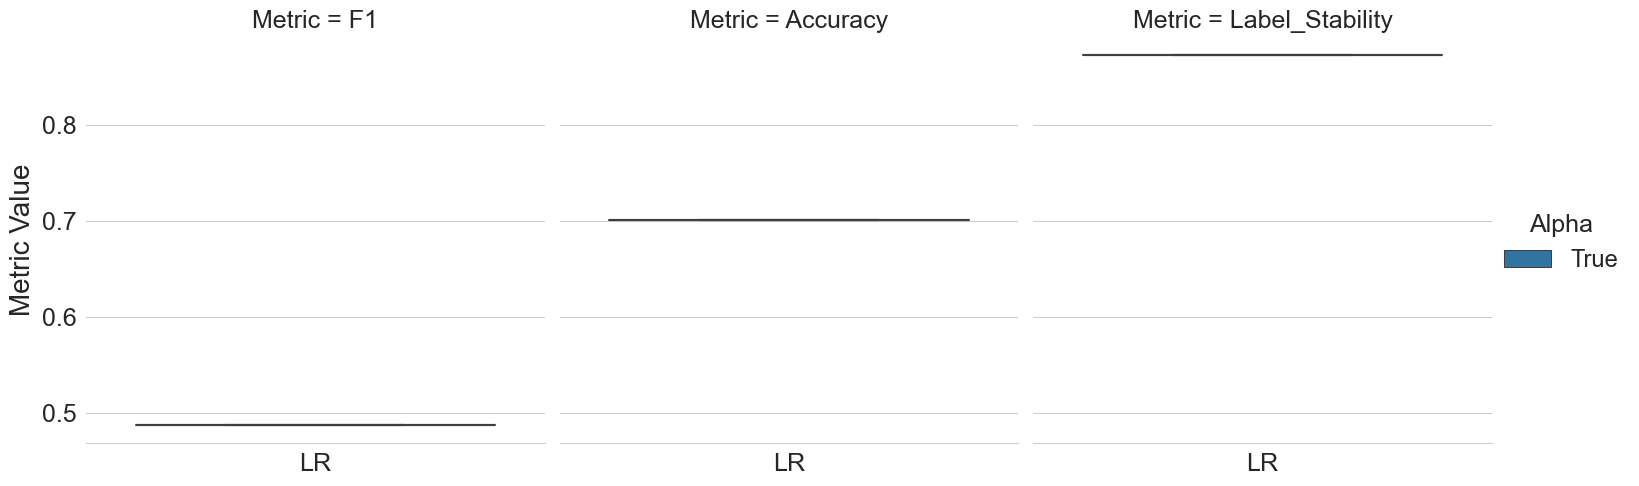

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

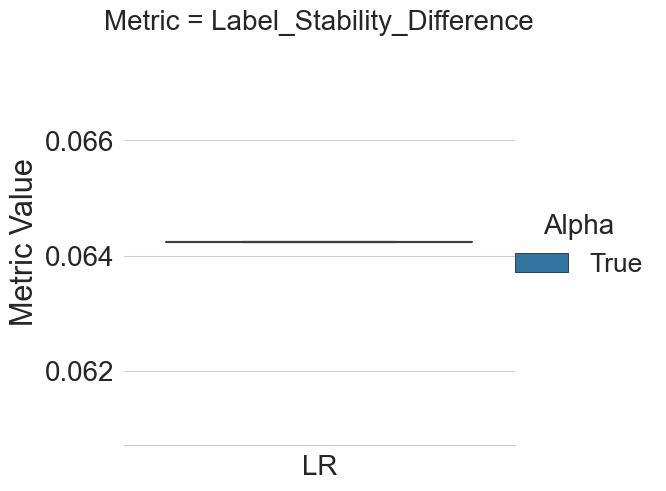

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

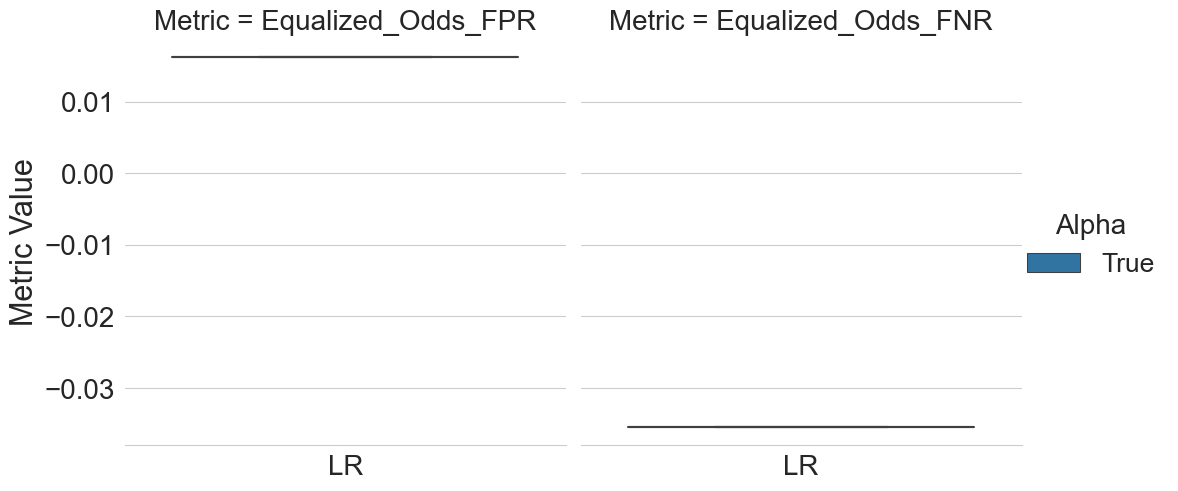

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

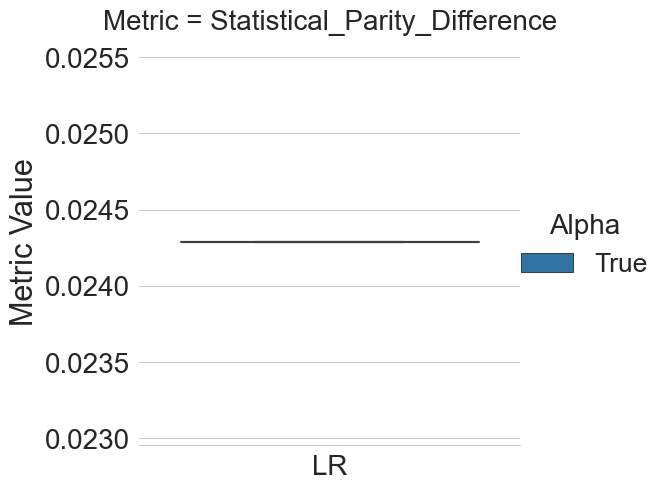

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)